# Assignment_2

# Part 1: SVM

### Use the following function to plot the classification regions

In [98]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [99]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

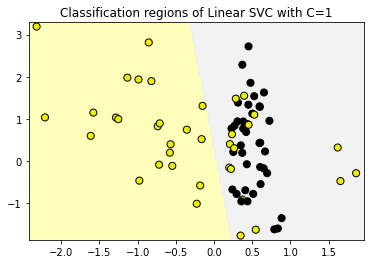

In [115]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


# svm = LinearSVC()
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

title = 'Classification regions of Linear SVC with C=1'
plot_class_regions_for_classifier(svm, X_train, y_train, X_test = None, y_test = None, title = title, target_names = None, plot_decision_regions = True)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

- As C is Larger, it fits the training data as well as possible and black training data points are more to be classified correctly and with less regularization and smaller margin.

- As C is Smaller, the more tolerants of errors on training data points with more regularization and  larger margin and more black points being misclassified.


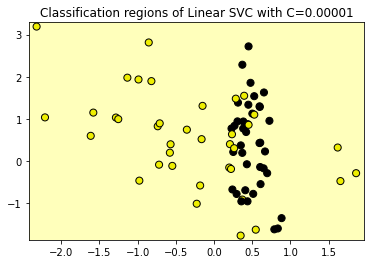

In [117]:
# svmS = LinearSVC(C=0.00001)
svmS = SVC(kernel='linear', C=0.00001)
svmS.fit(X_train, y_train)

title = 'Classification regions of Linear SVC with C=0.00001'
plot_class_regions_for_classifier(svmS, X_train, y_train, X_test = None, y_test = None, title=title, target_names = None, plot_decision_regions = True)

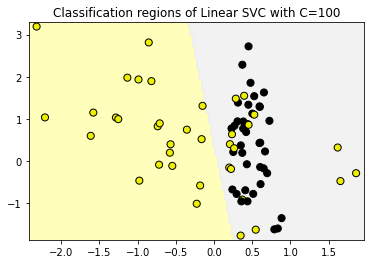

In [120]:
# svmL = LinearSVC( C=float(100))
svmL = SVC(kernel='linear', C=float(100))
svmL.fit(X_train, y_train)

title = 'Classification regions of Linear SVC with C=100'
plot_class_regions_for_classifier(svmL, X_train, y_train, X_test = None, y_test = None, title = title, target_names = None, plot_decision_regions = True)

### Use the fruits dataset in questions 4, 5, 6.

In [104]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [105]:
from sklearn.svm import LinearSVC

X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

X_fruits1 = fruits[['height', 'width']]

X_train_fruits, X_test_fruits, y_train_fruits, y_test_fruits = train_test_split(X_fruits1, y_fruits, test_size = 0.25, random_state = 0)

SVM_fruits = LinearSVC(random_state=0)
SVM_fruits.fit(X_train_fruits, y_train_fruits)

c:\Users\Tarek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why? 
2. Print the models' coefficients and intercepts.

- The SVM models have been trained 4 times as LinearSVC class supports the multiclass support and is handled according to a one-vs-the-rest scheme. So, as we have 4 classes -->  Train 4 SVM’s

--> SVM 1 classifies output = apple or not = apple

--> SVM 2 classifies output = mandarin or not = mandarin

--> SVM 3 classifies output = orange or not = orange

--> SVM 4 classifies output = lemon or not = lemon



In [106]:
print('Coefficients:\n')
print(SVM_fruits.coef_)
print('\n')
print('Intercepts:', SVM_fruits.intercept_)

Coefficients:

[[-0.28033959  0.47977722]
 [-1.10773924  0.78994293]
 [-0.0352852   0.2298446 ]
 [ 1.01072336 -1.26188316]]


Intercepts: [-1.53213304  0.7866717  -1.78182719  0.37214224]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

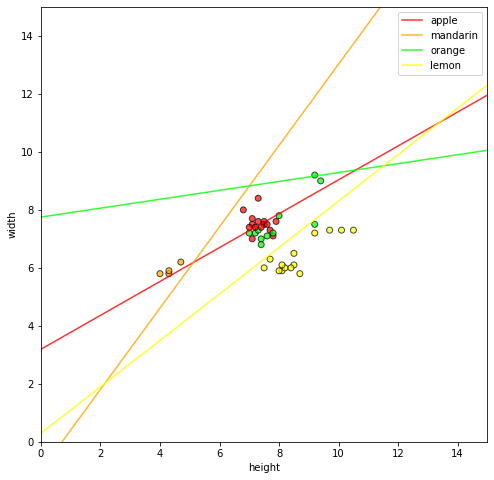

In [107]:
colors = ['#FF0000', '#FFA500', '#00FF00','#FFFF00']
cmap_fruits = ListedColormap(['#FF0000', '#FFA500', '#00FF00','#FFFF00'])
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

plt.figure(figsize=(8,8))
plt.scatter(X_train_fruits[['height']], X_train_fruits[['width']],
           c=y_train_fruits, cmap=cmap_fruits, edgecolor = 'black', alpha=0.7)

x_range = np.linspace(-10, 15)

for w, b, color, label in zip(SVM_fruits.coef_, SVM_fruits.intercept_, colors, target_names_fruits):
    plt.plot(x_range, -(x_range * w[0] + b) / w[1], c=color, alpha=0.8, label=label)

plt.legend()
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()



from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [108]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size = 0.25, random_state = 0)

parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
grid_search_cv = GridSearchCV(SVC(random_state=0), parameters, verbose=1, cv=3)
grid_search_cv.fit(X_train_cancer, y_train_cancer)

print(grid_search_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [110]:
from sklearn.svm import SVC

SVM_cancer = SVC(C = 10, kernel = 'rbf')
SVM_cancer.fit(X_train_cancer, y_train_cancer)

train_score = SVM_cancer.score(X_train_cancer, y_train_cancer)
print("Train score accuracy: ", train_score)

test_score = SVM_cancer.score(X_test_cancer, y_test_cancer)
print("Test score accuracy: ", test_score)

Train score accuracy:  0.9154929577464789
Test score accuracy:  0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)

SVM_cancer_normalized = SVC(C = 10, kernel = 'rbf')
SVM_cancer_normalized.fit(X_train_cancer_scaled, y_train_cancer)

train_score = SVM_cancer_normalized.score(X_train_cancer_scaled, y_train_cancer)
print("Normalised Train score accuracy: ", train_score)

test_score = SVM_cancer_normalized.score(X_test_cancer_scaled, y_test_cancer)
print("Normalised Test score accuracy: ", test_score)

Normalised Train score accuracy:  0.9882629107981221
Normalised Test score accuracy:  0.972027972027972
